In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

[Kaggle Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset/data)

In [16]:
data = pd.read_csv("Heart Attack.csv")
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [17]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [18]:
data.nunique()


age               75
gender             2
impluse           79
pressurehight    116
pressurelow       73
glucose          244
kcm              700
troponin         352
class              2
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [22]:
data['gender'].unique()

array([1, 0])

In [23]:
data["class"].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

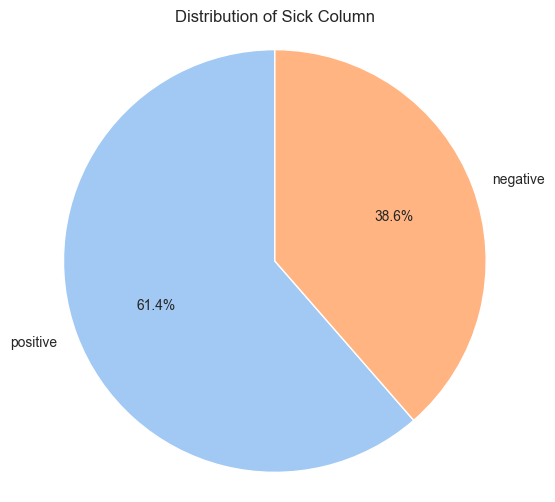

In [ ]:
value_counts = data["class"].value_counts()

sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

plt.figure(figsize=(6,6))
plt.pie(value_counts.values,labels=value_counts.index, colors=colors,autopct='%1.1f%%',startangle=90)

plt.title("Distribution of Sick Column")
plt.axis('equal')  
plt.show()


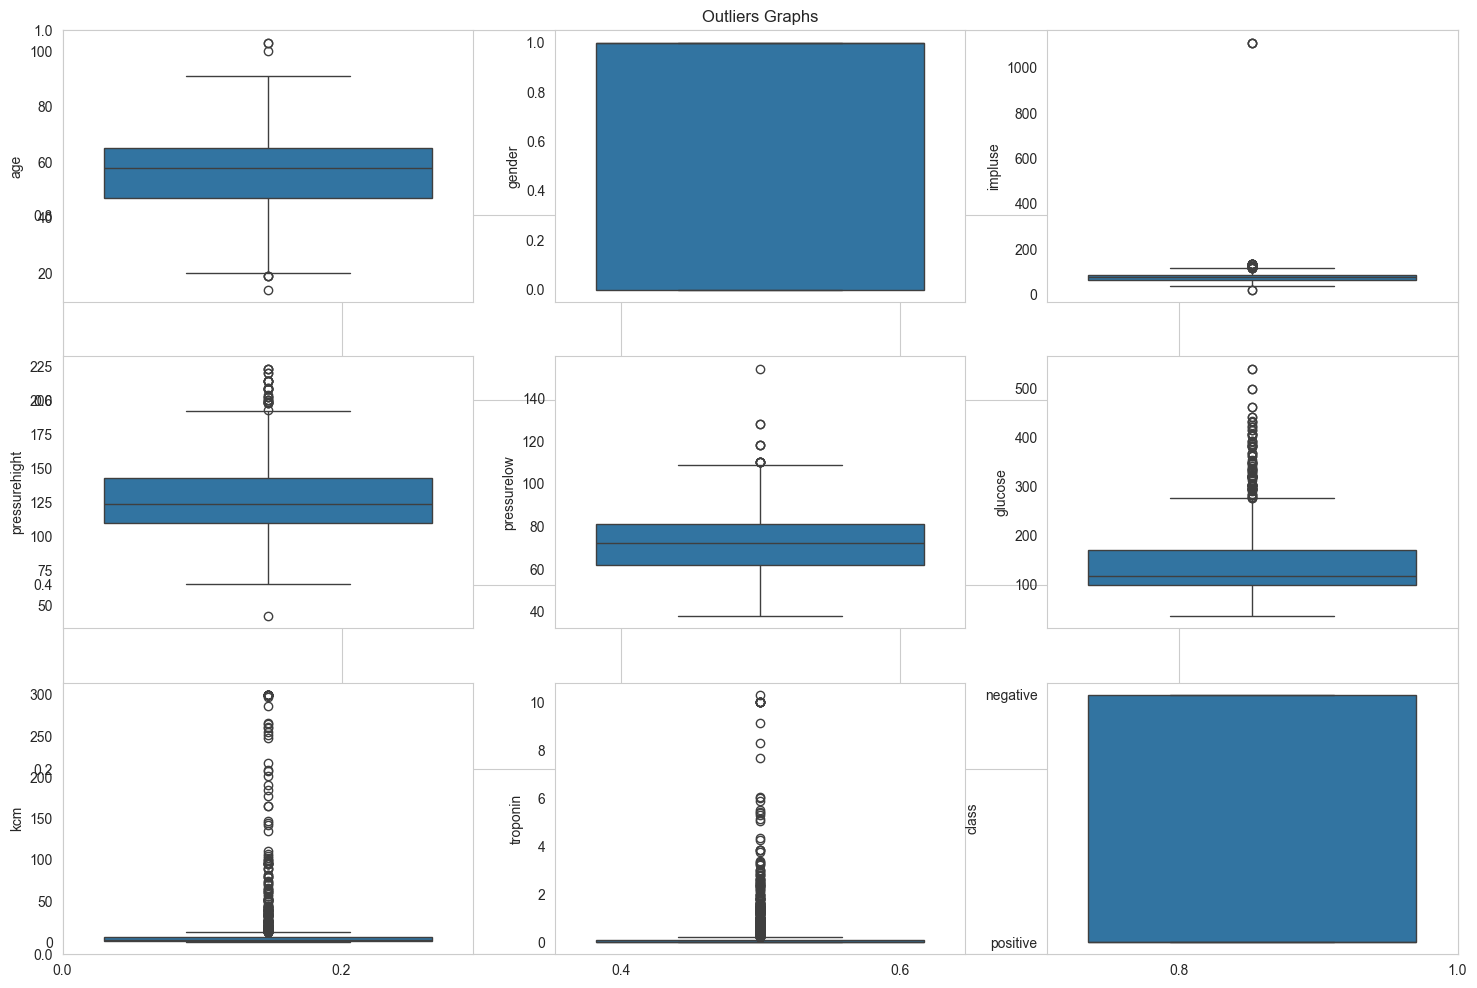

In [25]:
plt.figure(figsize=(18,12))
plt.title("Outliers Graphs")

for i,column in enumerate(data.select_dtypes(exclude="category"),start=1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.grid(visible=False)


plt.show()


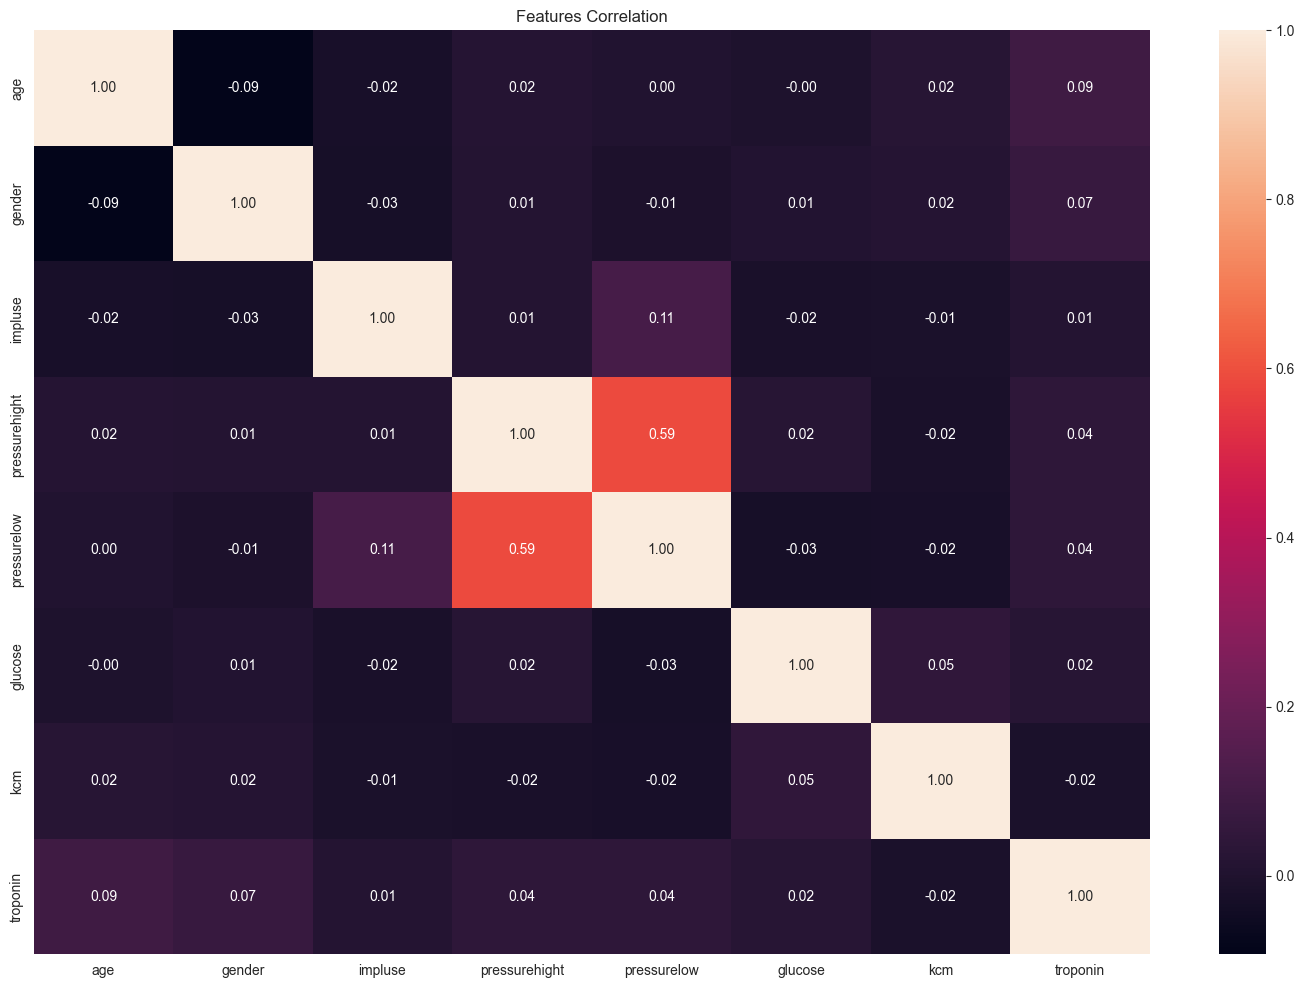

In [26]:
corr = data.iloc[:,:-1].corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Features Correlation")
plt.show()

In [27]:
mapping_data = {"negative":0 , "positive":1}
data["Sick"]=data["class"].map(mapping_data)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,Sick
0,64,1,66,160,83,160.0,1.80,0.012,negative,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,0
1315,66,1,84,125,55,149.0,1.33,0.172,positive,1
1316,45,1,85,168,104,96.0,1.24,4.250,positive,1
1317,54,1,58,117,68,443.0,5.80,0.359,positive,1


In [28]:
data.drop("class",inplace=True,axis=1)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,Sick
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [29]:
Columns_Scalers = {}
for column in ['age', 'impluse','pressurehight','pressurelow','glucose','kcm']:
    scaler = StandardScaler()
    data[column]  = scaler.fit_transform(data[[column]])
    Columns_Scalers[column] = scaler


In [30]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=False,test_size=0.2,random_state=42)

In [32]:
classweights = compute_class_weight(classes=np.unique(y),class_weight="balanced",y=y)
classweights = dict(zip(np.unique(y), classweights))
classweights

{np.int64(0): np.float64(1.2956777996070727),
 np.int64(1): np.float64(0.8141975308641975)}

In [33]:
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42,class_weight=classweights),
    "Random Forest": RandomForestClassifier(random_state=42,class_weight=classweights),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(random_state=42,class_weight=classweights),
    "Decision Tree": DecisionTreeClassifier(random_state=42,class_weight=classweights),
    "Extra Trees": ExtraTreesClassifier(random_state=42,class_weight=classweights),
    "Ridge Classifier": RidgeClassifier(random_state=42,class_weight=classweights)
}

ml_results = {}
for name, model in ml_models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    ml_results[name] = accuracy_score(y_test, preds)

In [34]:
all_results = sorted(ml_results.items(),key=lambda x: x[1])
all_results = dict(all_results)
all_results

{'Ridge Classifier': 0.6628787878787878,
 'SVC': 0.7121212121212122,
 'Logistic Regression': 0.7575757575757576,
 'Extra Trees': 0.946969696969697,
 'Random Forest': 0.9924242424242424,
 'Gradient Boosting': 0.9962121212121212,
 'Decision Tree': 0.9962121212121212,
 'AdaBoost': 1.0}

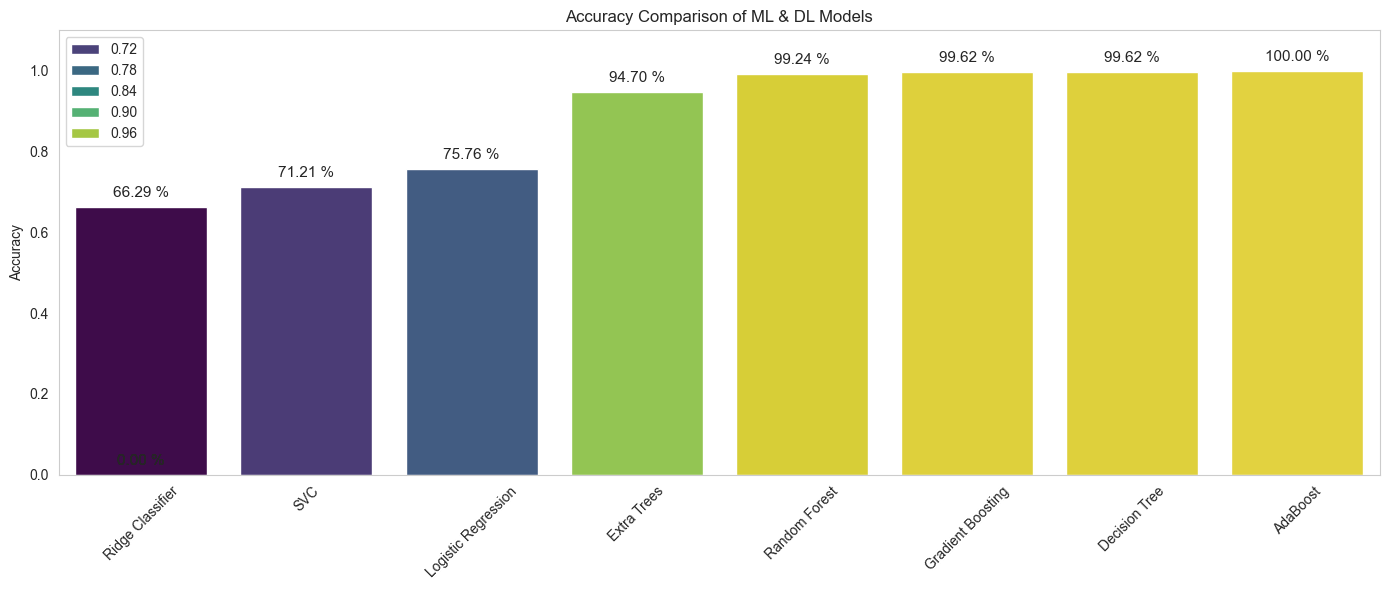

In [35]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=list(all_results.keys()),y=list(all_results.values()),palette="viridis",hue=list(all_results.values()))
plt.title("Accuracy Comparison of ML & DL Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.2f} %",(p.get_x() + p.get_width() / 2, height),ha="center",va="bottom",fontsize=11,xytext=(0, 5),textcoords="offset points")

plt.tight_layout()
plt.grid(False)
plt.show()


In [36]:
model = ml_models["Extra Trees"]
preds = model.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,preds)
print(f"The Best Accurecy is from Extra Trees model = {accuracy*100:0.2f}")


The Best Accurecy is from Extra Trees model = 94.70


In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        98
           1       0.96      0.96      0.96       166

    accuracy                           0.95       264
   macro avg       0.94      0.94      0.94       264
weighted avg       0.95      0.95      0.95       264



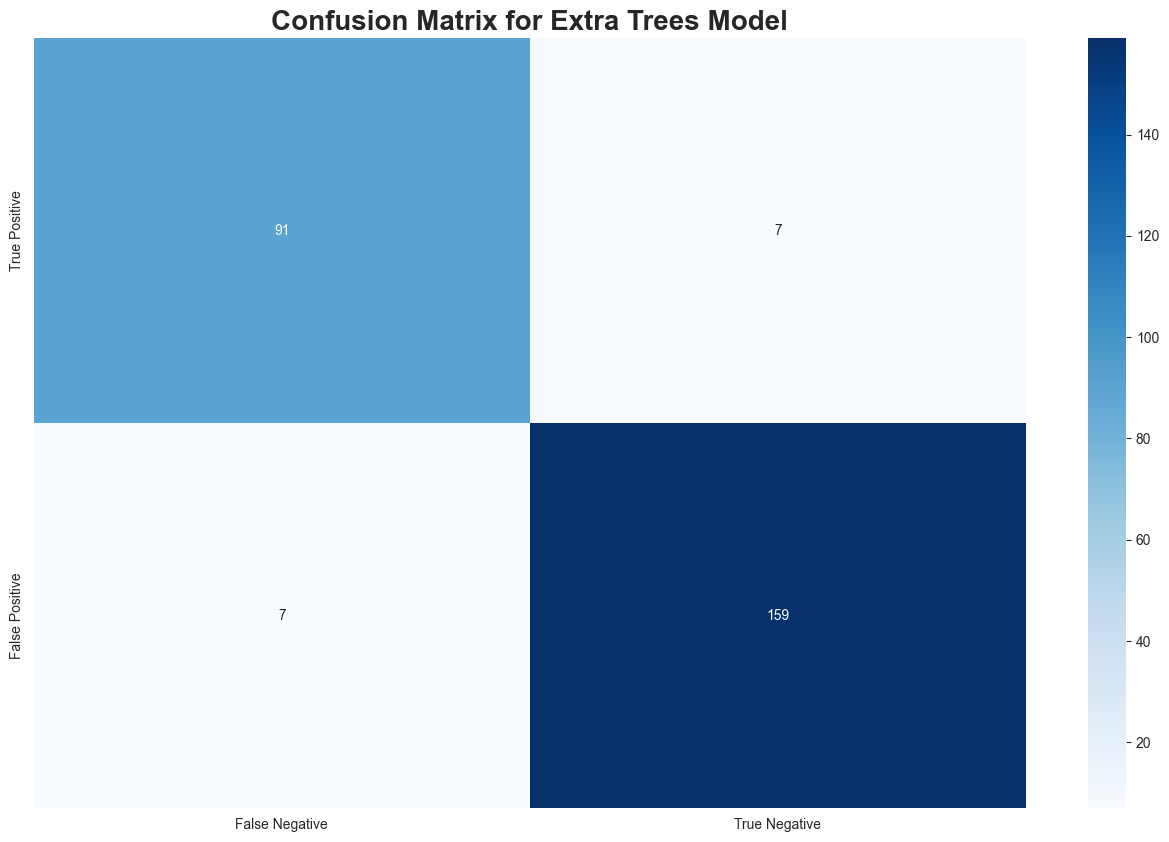

In [48]:
acc = confusion_matrix(y_test,preds)
plt.figure(figsize=(16,10))
plt.title("Confusion Matrix for Extra Trees Model",weight="bold",size=20)
sns.heatmap(acc,xticklabels=["False Negative","True Negative"],yticklabels=["True Positive","False Positive"],annot=True,cmap="Blues",fmt=f".0f")
plt.show()

In [44]:
test = pd.DataFrame({"age":[64],"gender":[1],"impluse":[66],"pressurehight":[160],"pressurelow":[83],"glucose":[160.0],"kcm":[1.80],"troponin":[0.012]})
model.predict(test)

array([1])

---

<h1 align="center">The End of model 😎</h1>


---